In [2]:
#导入sample、rank数据集
import pickle
import pandas as pd
sample_path = r'E:/code/nq/nq/sample500/sample.pkl'
rank_path = 'E:/code/nq/nq/rank10-500/nq/nq-rank10-all.tsv'
# 尝试手动加载 pickle 文件
with open(sample_path, 'rb') as f:
    sample = pickle.load(f)
rank = pd.read_csv(rank_path, sep='\t')

print(type(sample))
print(type(rank))


<class 'dict'>
<class 'pandas.core.frame.DataFrame'>


In [3]:
#rank数据集结构
print(rank.info())
print(rank.shape)
print(rank.head)
rank_qid = rank['query_id']
print(f"rank_qid数量为：{len(set(rank_qid))}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34520 entries, 0 to 34519
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   query_id  34520 non-null  object 
 1   doc_id    34520 non-null  object 
 2   answer    34520 non-null  float64
dtypes: float64(1), object(2)
memory usage: 809.2+ KB
None
(34520, 3)
<bound method NDFrame.head of        query_id      doc_id    answer
0       test291   doc515250  1.710614
1       test291   doc515229  1.701058
2       test291    doc10943  1.677855
3       test291   doc521311  1.666365
4       test291   doc515254  1.665312
...         ...         ...       ...
34515  test1028  doc2648902  1.236868
34516  test1028  doc1719644  1.232535
34517  test1028  doc1719641  1.228221
34518  test1028    doc97822  1.222582
34519  test1028  doc2379599  1.221373

[34520 rows x 3 columns]>
rank_qid数量为：3452


In [4]:
#查看sample数据集结构
import pprint
first_key = list(sample.items())[0]  # 获取字典的第一个键值对
pprint.pprint(first_key)

('test291',
 {'doc10943': {'cluster_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
               'entropy': -0.0,
               'greedy': 'Adrenaline (epinephrine) and noradrenaline '
                         '(norepinephrine).',
               'samples': ['Adrenaline (epinephrine) and noradrenaline '
                           '(norepinephrine).',
                           'Adrenaline (epinephrine) and noradrenaline '
                           '(norepinephrine).',
                           'Adrenaline (epinephrine) and noradrenaline '
                           '(norepinephrine).',
                           'Adrenaline (epinephrine) and noradrenaline '
                           '(norepinephrine).',
                           'Adrenaline (epinephrine) and noradrenaline '
                           '(norepinephrine).',
                           'Adrenaline (epinephrine) and noradrenaline '
                           '(norepinephrine).',
                           'Adrenaline (epinephrine

In [10]:
#加载beir数据集
import json
beir_path = r"E:\code\nq\nq\beir-dataset\nq\beir_nq\nq\nq\queries.jsonl"
with open(beir_path, 'r', encoding='utf-8') as f:
    data = [json.loads(line) for line in f]
# 将数据转换为 pandas DataFrame
beir = pd.DataFrame(data)

In [11]:
print(beir.info)
print(beir.columns)

<bound method DataFrame.info of            _id                                               text metadata
0        test0  what is non controlling interest on balance sheet       {}
1        test1     how many episodes are in chicago fire season 4       {}
2        test2    who sings love will keep us alive by the eagles       {}
3        test3          who is the leader of the ontario pc party       {}
4        test4    nitty gritty dirt band fishin in the dark album       {}
...        ...                                                ...      ...
3447  test3447             when is the met office leaving the bbc       {}
3448  test3448          where does junior want to go to find hope       {}
3449  test3449         who does eric end up with in that 70s show       {}
3450  test3450     where does the great outdoors movie take place       {}
3451  test3451   when will notre dame played michigan state again       {}

[3452 rows x 3 columns]>
Index(['_id', 'text', 'metadata'], dtype='

### 查看sample采样

In [6]:
docs_count_list = []
cluster_ids_length_list = []
greedy_length_list = []
# 提取数据
for test_key, test_value in sample.items():
    docs_count = len(test_value)
    docs_count_list.append(docs_count)
    for doc_key, doc_value in test_value.items():
        cluster_ids_length = len(doc_value['cluster_ids'])
        greedy_length = len(doc_value['greedy'])
        cluster_ids_length_list.append(cluster_ids_length)
        greedy_length_list.append(greedy_length)

In [7]:
import numpy as np
def print_statistics(data_list, list_name):

    print(f"{list_name} 统计信息:")
    print(f"最小值: {np.min(data_list)}")
    print(f"最大值: {np.max(data_list)}")
    print(f"均值: {np.mean(data_list)}")
    print(f"标准差: {np.std(data_list)}")
    print("\n")

# 示例调用
print_statistics(docs_count_list, "docs_count_list")
print_statistics(cluster_ids_length_list, "cluster_ids_length_list")
print_statistics(greedy_length_list, "greedy_length_list")

docs_count_list 统计信息:
最小值: 11
最大值: 11
均值: 11.0
标准差: 0.0


cluster_ids_length_list 统计信息:
最小值: 10
最大值: 10
均值: 10.0
标准差: 0.0


greedy_length_list 统计信息:
最小值: 0
最大值: 343
均值: 138.9657905825345
标准差: 84.73256870753953




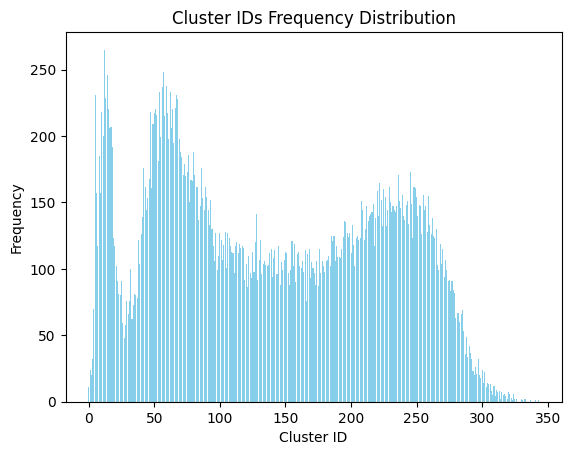

In [8]:
from collections import Counter
import matplotlib.pyplot as plt
count = Counter(greedy_length_list)# 使用 Counter 来统计每个数字出现的次数
# 提取数据用于绘制柱状图
numbers = list(count.keys())  # 数字
frequencies = list(count.values())  # 出现次数
# 绘制柱状图
plt.bar(numbers, frequencies, color='skyblue')
# 添加标题和标签
plt.title('Cluster IDs Frequency Distribution')
plt.xlabel('Cluster ID')
plt.ylabel('Frequency')
# 显示图表
plt.show()


In [9]:
def count_empty_greedy(data):
    empty_count = 0
    
    for test_key, test_value in sample.items():
        for doc_key, doc_value in test_value.items():
            greedy_value = doc_value.get('greedy', '').strip()  # 获取greedy值并去除空格
            if not greedy_value:  # 空字符串 ''、None、0、空列表 []、空字典 {}、False 等是“假值”
                empty_count += 1
                
    return empty_count
# 示例调用
empty_greedy_count = count_empty_greedy(sample)
print(f"greedy 字段为空字符串或为空值的个数: {empty_greedy_count}")

greedy 字段为空字符串或为空值的个数: 11


### 查看sample (3452) 和 rank(3452) 匹配

In [2]:
rank_qid = rank['query_id']
sample_qid = set(list(sample.keys()))
common_qids = list(set(rank_qid).intersection(sample_qid))# 找到 rank_qid 和 sample_qid 的交集
#common_data = rank[rank['query_id'].isin(common_qids)]
# 保存为 CSV 文件
#pd.DataFrame(common_qids, columns=['query_id']).to_csv('common_query_ids.csv', index=False)
len(common_qids)

3452

### nq 和 beir 数据集匹配结果

In [10]:
import pyarrow.parquet as pq
import pyarrow as pa
import os

# 读取Parquet文件路径为列表

parquet_dir = "F:\datasets\google-research-datasets___natural_questions\dev"
parquet_files = [os.path.join(parquet_dir, f) for f in os.listdir(parquet_dir) if f.endswith('.parquet')]

# 创建一个空列表，存储每个文件的数据
tables = []

# 遍历每个 Parquet 文件并读取数据
for file in parquet_files:
    # 打开 Parquet 文件
    parquet_file = pq.ParquetFile(file)
    
    # 读取文件的全部数据
    table = parquet_file.read()
    
    # 将读取到的表添加到列表中
    tables.append(table)

# 合并所有表为一个大表
combined_table = pa.concat_tables(tables)

# 打印合并后的表
print(type(combined_table))


<class 'pyarrow.lib.Table'>


In [29]:
id = combined_table.column('id')
question = combined_table.column('question')
annotations = combined_table.column('annotations')
print(id.type)
print(question.type)
print(annotations.type)

string
struct<text: string, tokens: list<item: string>>
struct<id: list<item: string>, long_answer: list<item: struct<start_token: int64, end_token: int64, start_byte: int64, end_byte: int64, candidate_index: int64>>, short_answers: list<item: struct<start_token: list<item: int64>, end_token: list<item: int64>, start_byte: list<item: int64>, end_byte: list<item: int64>, text: list<item: string>>>, yes_no_answer: list<item: int64>>


In [38]:
#获取short_answers_text(list)
import pyarrow as pa

# 创建 pyarrow Table
annotations = pa.table({
    'annotations': annotations
})

# 获取 short_answers 列数据
annotations_column = annotations['annotations']

# 提取 short_answers 中的每个 text 字段
short_answers_text = []

for row in annotations_column.to_pylist():
    # 提取每一行的 short_answers 列表
    short_answers = row['short_answers']
    texts = []
    for answer in short_answers:
        # 提取每个 short_answer 的 text 字段（text 是一个列表，我们只取第一个元素）
        texts.extend(answer['text'])  # 如果你想要保留 text 列表中的所有项，可以使用 extend
    short_answers_text.append(texts)

# 打印结果
for idx, texts in enumerate(short_answers_text):
    print(f"Item {idx + 1}:")
    for text in texts:
        print(f"  Text: {text}")
print(type(short_answers_text))

Item 1:
  Text: Max Planck, Albert Einstein, Louis de Broglie, Arthur Compton, Niels Bohr and many others
  Text: Einstein
Item 2:
  Text: 100
  Text: 100 members, two from each of the 50 states
  Text: 100 members
  Text: 100
  Text: 100
Item 3:
  Text: Deposition
  Text: desublimation
  Text: Deposition
  Text: Deposition
  Text: Deposition
  Text: Deposition
Item 4:
  Text: pneumonoultramicroscopicsilicovolcanoconiosis
  Text: Pneumonoultramicroscopicsilicovolcanoconiosis
  Text: Pneumonoultramicroscopicsilicovolcanoconiosis
  Text: Methionylglutaminylarginyltyrosylglutamyl...serine
Item 5:
  Text: Bob Pettit
  Text: Kobe Bryant
  Text: Bob Pettit
  Text: Kobe Bryant
  Text: Bob Pettit
  Text: Kobe Bryant
  Text: Bob Pettit
  Text: Kobe Bryant
  Text: Bob Pettit
  Text: Kobe Bryant
Item 6:
  Text: roughly 78%
  Text: 78%
  Text: roughly 78%
Item 7:
Item 8:
Item 9:
  Text: neutral, at pH 7 (25 °C), being neither an acid nor a base
  Text: potential of hydrogen
Item 10:
  Text: bird n

In [44]:

import pyarrow as pa
# 创建 pyarrow Table
table = pa.table({'question': question})

# 获取 question 列数据
annotations_column = table['question']
# 提取 text 字段
questions_text = []

for row in annotations_column.to_pylist():
    # 获取每一行的 question 字段
    question = row['text']
    # 提取 text 字段
    questions_text.append(question)
# 打印结果
for idx, text in enumerate(questions_text):
    print(f"Item {idx + 1}: {text}")
print(type(questions_text))


Item 1: who proposed that electrons behave like waves and particles
Item 2: how many senators are there in the us senate
Item 3: phase change from gas to solid is called
Item 4: what is the longest english word in the dictionary
Item 5: who has the most all star mvp awards
Item 6: what percentage of the earth's surface is water
Item 7: who wants to be a millionaire new zealand
Item 8: where does the last name brock come from
Item 9: what is the definition of ph in water
Item 10: where does bird's nest soup come from
Item 11: where do the neutrons come from in nuclear fission
Item 12: how many breeds of pigs are there in the uk
Item 13: what is the plot of bendy and the ink machine
Item 14: who sang the theme song to that 70s show
Item 15: how many episodes are there in high school dxd
Item 16: when does the last episode of adventure time air
Item 17: who won oscar for best director this month
Item 18: when was the first dark tower book published
Item 19: when was zero first used in mat

In [49]:

# 创建一个空列表来存储最终结果
result = []

# 遍历每个块，逐块提取数据
for i in range(id.num_chunks):
    # 获取每个块
    chunk = id.chunk(i)
    
    # 获取每个块的长度
    chunk_length = len(chunk)
    
    # 逐个提取每个元素
    for j in range(chunk_length):
        # 使用 chunk[j] 来访问每个元素，获取元素的值
        result.append(chunk[j].as_py())  # 转换为 Python 类型

# 打印转换后的 Python 列表
print(type(result[0]))


<class 'str'>


In [28]:
import pandas as pd
import os

# 假设 Parquet 文件存放在某个目录
parquet_dir = "F:\datasets\google-research-datasets___natural_questions\dev"
files = [os.path.join(parquet_dir, f) for f in os.listdir(parquet_dir) if f.endswith('.parquet')]

# 读取所有 Parquet 文件并合并为一个 DataFrame
nq_dev = pd.concat([pd.read_parquet(f) for f in files], ignore_index=True)

# 查看数据集
print(nq_dev.head())
    

                     id                                           document  \
0  -5501481664893105662  {'title': 'Wave–particle duality', 'url': 'htt...   
1   8594030243394572667  {'title': 'Current members of the United State...   
2   -716176363900512091  {'title': 'Deposition (phase transition)', 'ur...   
3  -5593761806871287545  {'title': 'Longest word in English', 'url': 'h...   
4   4245798066923223457  {'title': 'NBA All-Star Game Most Valuable Pla...   

                                            question  \
0  {'text': 'who proposed that electrons behave l...   
1  {'text': 'how many senators are there in the u...   
2  {'text': 'phase change from gas to solid is ca...   
3  {'text': 'what is the longest english word in ...   
4  {'text': 'who has the most all star mvp awards...   

                              long_answer_candidates  \
0  {'start_token': [18, 19, 69, 70, 81, 87, 153, ...   
1  {'start_token': [91, 128, 129, 137, 148, 159, ...   
2  {'start_token': [20, 21

In [29]:
print(nq_dev.info)
print(nq_dev.shape)
print(nq_dev.columns)

<bound method DataFrame.info of                         id                                           document  \
0     -5501481664893105662  {'title': 'Wave–particle duality', 'url': 'htt...   
1      8594030243394572667  {'title': 'Current members of the United State...   
2      -716176363900512091  {'title': 'Deposition (phase transition)', 'ur...   
3     -5593761806871287545  {'title': 'Longest word in English', 'url': 'h...   
4      4245798066923223457  {'title': 'NBA All-Star Game Most Valuable Pla...   
...                    ...                                                ...   
7825  -4616596799374362422  {'title': 'Kate Warne', 'url': 'https://en.wik...   
7826  -3650291155113659146  {'title': 'List of Modern Family episodes', 'u...   
7827   3381924381590631417  {'title': 'Solomon's Temple', 'url': 'https://...   
7828  -1370702280698958195  {'title': 'The Simpsons', 'url': 'https://en.w...   
7829   -154783694579651082  {'title': 'Google Maps pin', 'url': 'https://e...

In [4]:
type = nq_dev['id'].dtypes
print(type)

object


In [3]:
#只选取nq_val中的id、question及short_answer来进行后续处理
import pandas as pd
import itertools
nq_val = nq_dev[['id', 'question']]
nq_val = nq_val.copy()  
# annotations 中的 short_answers 的 text
def extract_short_answers(annotation):
    # 获取short_answers字段的值
    short_answers = annotation.get('short_answers', "") #short_answers numpy.ndarray
    text_list = []
    # 遍历short_answers，提取每个answer的'text'
    for answer in short_answers:
        text_list.append(answer['text'])  #short_answers numpy.ndarray          
    return text_list
nq_val['short_answers_text'] = nq_dev['annotations'].apply(extract_short_answers)  #原因：使用的是 apply 方法，它对每一行（或每一行中的每个元素）调用 extract_short_answers 函数，并返回一个包含每行的结果的列表
# 用于展平每个嵌套数组
def flatten_nested_list(nested_list):
    return [item for sublist in nested_list for item in sublist]  # 展平嵌套数组

# 使用 flatten_nested_list函数 对 'short_answers_text' 列进行处理
nq_val['short_answers'] = nq_val['short_answers_text'].apply(flatten_nested_list)
#查看结果
print(nq_val.info)

<bound method DataFrame.info of                         id                                           question  \
0     -5501481664893105662  {'text': 'who proposed that electrons behave l...   
1      8594030243394572667  {'text': 'how many senators are there in the u...   
2      -716176363900512091  {'text': 'phase change from gas to solid is ca...   
3     -5593761806871287545  {'text': 'what is the longest english word in ...   
4      4245798066923223457  {'text': 'who has the most all star mvp awards...   
...                    ...                                                ...   
7825  -4616596799374362422  {'text': 'who was the pinkerton detective agen...   
7826  -3650291155113659146  {'text': 'how many episodes are there in moder...   
7827   3381924381590631417  {'text': 'who built the first temple for god i...   
7828  -1370702280698958195  {'text': 'when did the simpsons first air in u...   
7829   -154783694579651082  {'text': 'what is a dropped pin on google maps...

In [182]:
#删除short_answers_text列
#nq_val = nq_val.drop(columns=['short_answers_text'])
print(nq_val.info)

<bound method DataFrame.info of                         id                                           question  \
0     -5501481664893105662  who proposed that electrons behave like waves ...   
1      8594030243394572667       how many senators are there in the us senate   
2      -716176363900512091           phase change from gas to solid is called   
3     -5593761806871287545  what is the longest english word in the dictio...   
4      4245798066923223457               who has the most all star mvp awards   
...                    ...                                                ...   
7825  -4616596799374362422  who was the pinkerton detective agency's first...   
7826  -3650291155113659146       how many episodes are there in modern family   
7827   3381924381590631417    who built the first temple for god in jerusalem   
7828  -1370702280698958195              when did the simpsons first air in uk   
7829   -154783694579651082           what is a dropped pin on google maps for

In [5]:
type = nq_val['id'].dtypes
print(type)

object


In [178]:
#精确匹配结果  #统计question列的类型modify(修改)、oversize
print(nq_val['question'].apply(type).unique())  # 查看 'question'列的所有数据类型
nq_val['question_new'] = nq_val['question'].apply(lambda x: x['text'] if isinstance(x, dict) else x)
print(beir['text'].apply(type).unique())  # 查看 'text' 列的所有数据类型
print(nq_val['question_new'].apply(type).unique())  # 查看 'text' 列的所有数据类型


[<class 'str'>]
[<class 'str'>]
[<class 'str'>]


In [179]:
#左表（主表）、右表，读主表。右表建字典
matching_rows = pd.merge(beir['text'], nq_val['question_new'], left_on='text', right_on='question_new')
print(f"匹配的行数: {matching_rows.shape[0]}")

匹配的行数: 3452


In [186]:
#删除question_newt列
#nq_val = nq_val.drop(columns=['question_new'])

### 构造 nq_val 和 beir 匹配数据集 

In [11]:
import pandas as pd

# 如果 text 和 question 列是字典或其他结构，提取文本部分
beir['text'] = beir['text'].apply(lambda x: x['text'] if isinstance(x, dict) else x)
nq_val['question'] = nq_val['question'].apply(lambda x: x['text'] if isinstance(x, dict) else x)

# 使用 merge 进行合并，按 text 和 question 列进行匹配
merged_df = pd.merge(beir, nq_val, left_on='text', right_on='question', how='inner')


In [13]:
# 查看合并后的数据
print(merged_df.info)
print(merged_df.columns)
print(merged_df.shape)
print(merged_df.dtypes)

<bound method DataFrame.info of            _id                                               text metadata  \
0        test0  what is non controlling interest on balance sheet       {}   
1        test1     how many episodes are in chicago fire season 4       {}   
2        test2    who sings love will keep us alive by the eagles       {}   
3        test3          who is the leader of the ontario pc party       {}   
4        test4    nitty gritty dirt band fishin in the dark album       {}   
...        ...                                                ...      ...   
3447  test3447             when is the met office leaving the bbc       {}   
3448  test3448          where does junior want to go to find hope       {}   
3449  test3449         who does eric end up with in that 70s show       {}   
3450  test3450     where does the great outdoors movie take place       {}   
3451  test3451   when will notre dame played michigan state again       {}   

                        id     

In [15]:
#删除'short_answers_text'
merged_df = merged_df.drop(columns=['short_answers_text'])

In [16]:
#修改列名
merged_df.columns = ['beir_qid', 'beir_question', 'metadata','nq_qid', 'nq_question', 'short_answers_text']

In [17]:
print(merged_df.info)
print(merged_df.columns)
print(merged_df.dtypes)

<bound method DataFrame.info of       beir_qid                                      beir_question metadata  \
0        test0  what is non controlling interest on balance sheet       {}   
1        test1     how many episodes are in chicago fire season 4       {}   
2        test2    who sings love will keep us alive by the eagles       {}   
3        test3          who is the leader of the ontario pc party       {}   
4        test4    nitty gritty dirt band fishin in the dark album       {}   
...        ...                                                ...      ...   
3447  test3447             when is the met office leaving the bbc       {}   
3448  test3448          where does junior want to go to find hope       {}   
3449  test3449         who does eric end up with in that 70s show       {}   
3450  test3450     where does the great outdoors movie take place       {}   
3451  test3451   when will notre dame played michigan state again       {}   

                    nq_qid     

In [34]:
merged_df = merged_df.drop(columns=['metadata'])

In [35]:
merged_df = merged_df.drop(columns=['nq_question'])

In [32]:
#d对short_answers_text进行去重
# 转化为集合去除列表中的重复字符串
def remove_duplicates_from_list(x):
    if isinstance(x, list):  # 判断是否是列表
        return list(set(x))  # 将列表转换为集合去重，再转换回列表
    return x  # 如果不是列表，原样返回

# 使用 apply 方法对 short_answers_text 列去重
merged_df['short_answers'] = merged_df['short_answers_text'].apply(remove_duplicates_from_list)

# 输出去重后的数据
print(merged_df['short_answers'].head())


0    [the portion of a subsidiary corporation's sto...
1                                                 [23]
2    [lead vocals by bassist Timothy B. Schmit, Tim...
3    [Patrick Brown, Patrick Walter Brown MPP, Patr...
4                                            [Hold On]
Name: short_answers, dtype: object


In [37]:
merged_df = merged_df.drop(columns=['short_answers_text'])

In [55]:
print(merged_df.info)
print(merged_df.dtypes)

<bound method DataFrame.info of       beir_qid                                      beir_question  \
0        test0  what is non controlling interest on balance sheet   
1        test1     how many episodes are in chicago fire season 4   
2        test2    who sings love will keep us alive by the eagles   
3        test3          who is the leader of the ontario pc party   
4        test4    nitty gritty dirt band fishin in the dark album   
...        ...                                                ...   
3447  test3447             when is the met office leaving the bbc   
3448  test3448          where does junior want to go to find hope   
3449  test3449         who does eric end up with in that 70s show   
3450  test3450     where does the great outdoors movie take place   
3451  test3451   when will notre dame played michigan state again   

                    nq_qid                                      short_answers  
0       572852451712299990  [the portion of a subsidiary co

In [56]:
#将构造数据集保存为jsonl文件  
merged_df.to_json(r'E:\code\nq\nq\beir-dataset\matches_beir_nq.jsonl', orient="records" ,lines=True,force_ascii=False)

In [ ]:
import json

# 使用 with open 形式保存为 JSONL 文件
with open(r'E:\code\nq\nq\beir-dataset\beir_nq.jsonl', 'w', encoding='utf-8') as f:
    for index, row in merged_df.iterrows():
        # 将每一行转换为字典并写入文件
        f.write(json.dumps(row.to_dict(), ensure_ascii=False) + '\n')

In [1]:
#加载matches jsonl文件
import pandas as pd
matches_path = r'E:\code\nq\nq\beir-dataset\matches_beir_nq.jsonl'
beir_nq_matches = pd.read_json(matches_path, lines=True,dtype = {"nq_qid" : str})#read_json 函数会根据列的数据内容推断类型，因此将nq_qid转化为了int64类型

print(beir_nq_matches.info)
print(beir_nq_matches.columns)
print(beir_nq_matches.dtypes)


<bound method DataFrame.info of       beir_qid                                      beir_question  \
0        test0  what is non controlling interest on balance sheet   
1        test1     how many episodes are in chicago fire season 4   
2        test2    who sings love will keep us alive by the eagles   
3        test3          who is the leader of the ontario pc party   
4        test4    nitty gritty dirt band fishin in the dark album   
...        ...                                                ...   
3447  test3447             when is the met office leaving the bbc   
3448  test3448          where does junior want to go to find hope   
3449  test3449         who does eric end up with in that 70s show   
3450  test3450     where does the great outdoors movie take place   
3451  test3451   when will notre dame played michigan state again   

                    nq_qid                                      short_answers  
0       572852451712299990  [the portion of a subsidiary co

### 统计短答案分布

In [5]:
# 统计空列表的数量
def is_empty_list(x):
    if isinstance(x, list):  # 判断是否是列表类型
        return "empty" if len(x) == 0 else "no_empty"  # 如果是列表，检查其长度是否为0
    return -1  # 如果不是列表，返回 -1

empty_lists = beir_nq_matches['short_answers'].apply(is_empty_list)

# 输出空列表的数量
print(empty_lists)


0       no_empty
1       no_empty
2       no_empty
3       no_empty
4       no_empty
          ...   
3447    no_empty
3448    no_empty
3449    no_empty
3450    no_empty
3451    no_empty
Name: short_answers, Length: 3452, dtype: object


short_answers
no_empty    2728
empty        724
Name: count, dtype: int64


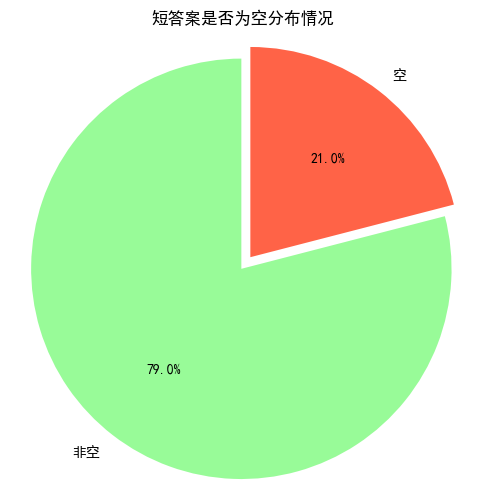

In [20]:
import matplotlib.pyplot as plt
import matplotlib

# 设置中文字体
matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
matplotlib.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

empty_lists_counts = empty_lists.value_counts()
print(empty_lists_counts)
#突出空的部分
explode = (0,0.07)
# 绘制饼图
plt.figure(figsize=(6, 6))
plt.pie(empty_lists_counts, labels=['非空', '空'], autopct='%1.1f%%', startangle=90, colors=['palegreen', 'tomato'],explode = explode)
plt.title('短答案是否为空分布情况')
plt.axis('equal')  # 确保饼图是圆形
plt.show()


In [27]:
def is_empty(value):
    return value is None or value == '' or (isinstance(value, list) and len(value) == 0)

# 使用 apply 方法对 short_answers 列进行检查
filtered_df = beir_nq_matches[beir_nq_matches['short_answers'].apply(is_empty)]

# 提取 nq_qid 和 short_answers
result = filtered_df[['nq_qid', 'short_answers']]

# 查看结果   
print(result) #确认识到的空值为空


                    nq_qid short_answers
18     8607984062421196486            []
21    -3103249637305531521            []
29     1906474815716600628            []
33     -831433284691324826            []
34     6184256908222313043            []
...                    ...           ...
3415  -5033448839816995975            []
3419  -1541885141217252270            []
3430  -2562780822153922949            []
3439    448942030064199113            []
3442   2559125656311963994            []

[724 rows x 2 columns]


In [32]:
nq_dev.columns

Index(['id', 'document', 'question', 'long_answer_candidates', 'annotations'], dtype='object')

In [34]:
#提取nq_qid对应的nq数据集id的annotations
results_empty = pd.merge(nq_dev[['id', 'annotations']], result['nq_qid'], left_on='id', right_on='nq_qid')
# 查看结果
print(results_empty['annotations'])

0      {'id': ['9655254767258708484', '84015818494681...
1      {'id': ['2138479929194519003', '29266989513697...
2      {'id': ['14135774449191746508', '1737226880867...
3      {'id': ['13216967055323742345', '1181957484838...
4      {'id': ['12005970305028598428', '1607271232407...
                             ...                        
719    {'id': ['8955150100155268603', '12034034071402...
720    {'id': ['13480208013832738945', '1108846405718...
721    {'id': ['17680524275973001081', '6337093991444...
722    {'id': ['10540342789974253806', '1182964300128...
723    {'id': ['1588944390514450465', '17467553965816...
Name: annotations, Length: 724, dtype: object


In [41]:
# 假设 results_empty['annotations'] 是您的 Series，且每个元素都是一个字典
annotations_series = results_empty['annotations']

# 提取每个字典中的 short_answer
short_answers = annotations_series.apply(lambda x: x.get('short_answer'))

# 打印提取的 short_answer
print(short_answers)

0      None
1      None
2      None
3      None
4      None
       ... 
719    None
720    None
721    None
722    None
723    None
Name: annotations, Length: 724, dtype: object


In [ ]:
results_empty['annotations'].to_csv(r'E:\code\nq\nq\empty_nq.csv', index=False, encoding='utf-8')